In [2]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(cowplot)
    library(broom)
    library(scico)
    library(viridis)
    library(paletteer)
    theme_set(theme_cowplot())
})
options(repr.plot.width=16,repr.plot.height=10)

# Color Palettes

# Continuous color palettes

In [3]:
volcano_df <- data.frame(
  x = rep(seq_len(ncol(volcano)), each = nrow(volcano)),
  y = rep(seq_len(nrow(volcano)), ncol(volcano)),
  height = as.vector(volcano)
)

In [4]:
p <- ggplot(faithfuld, aes(x=waiting, y=eruptions, fill=density)) +
geom_raster() +
coord_cartesian(expand=0) +
guides(fill=guide_colourbar(barwidth=20,direction = 'horizontal',position = 'bottom'))

In [5]:
p <- ggplot(volcano_df, aes(x=y, y=x, fill=height)) +
geom_raster() +
guides(fill=guide_colourbar(barheight=15,direction = 'vertical')) +
coord_fixed(expand=0)

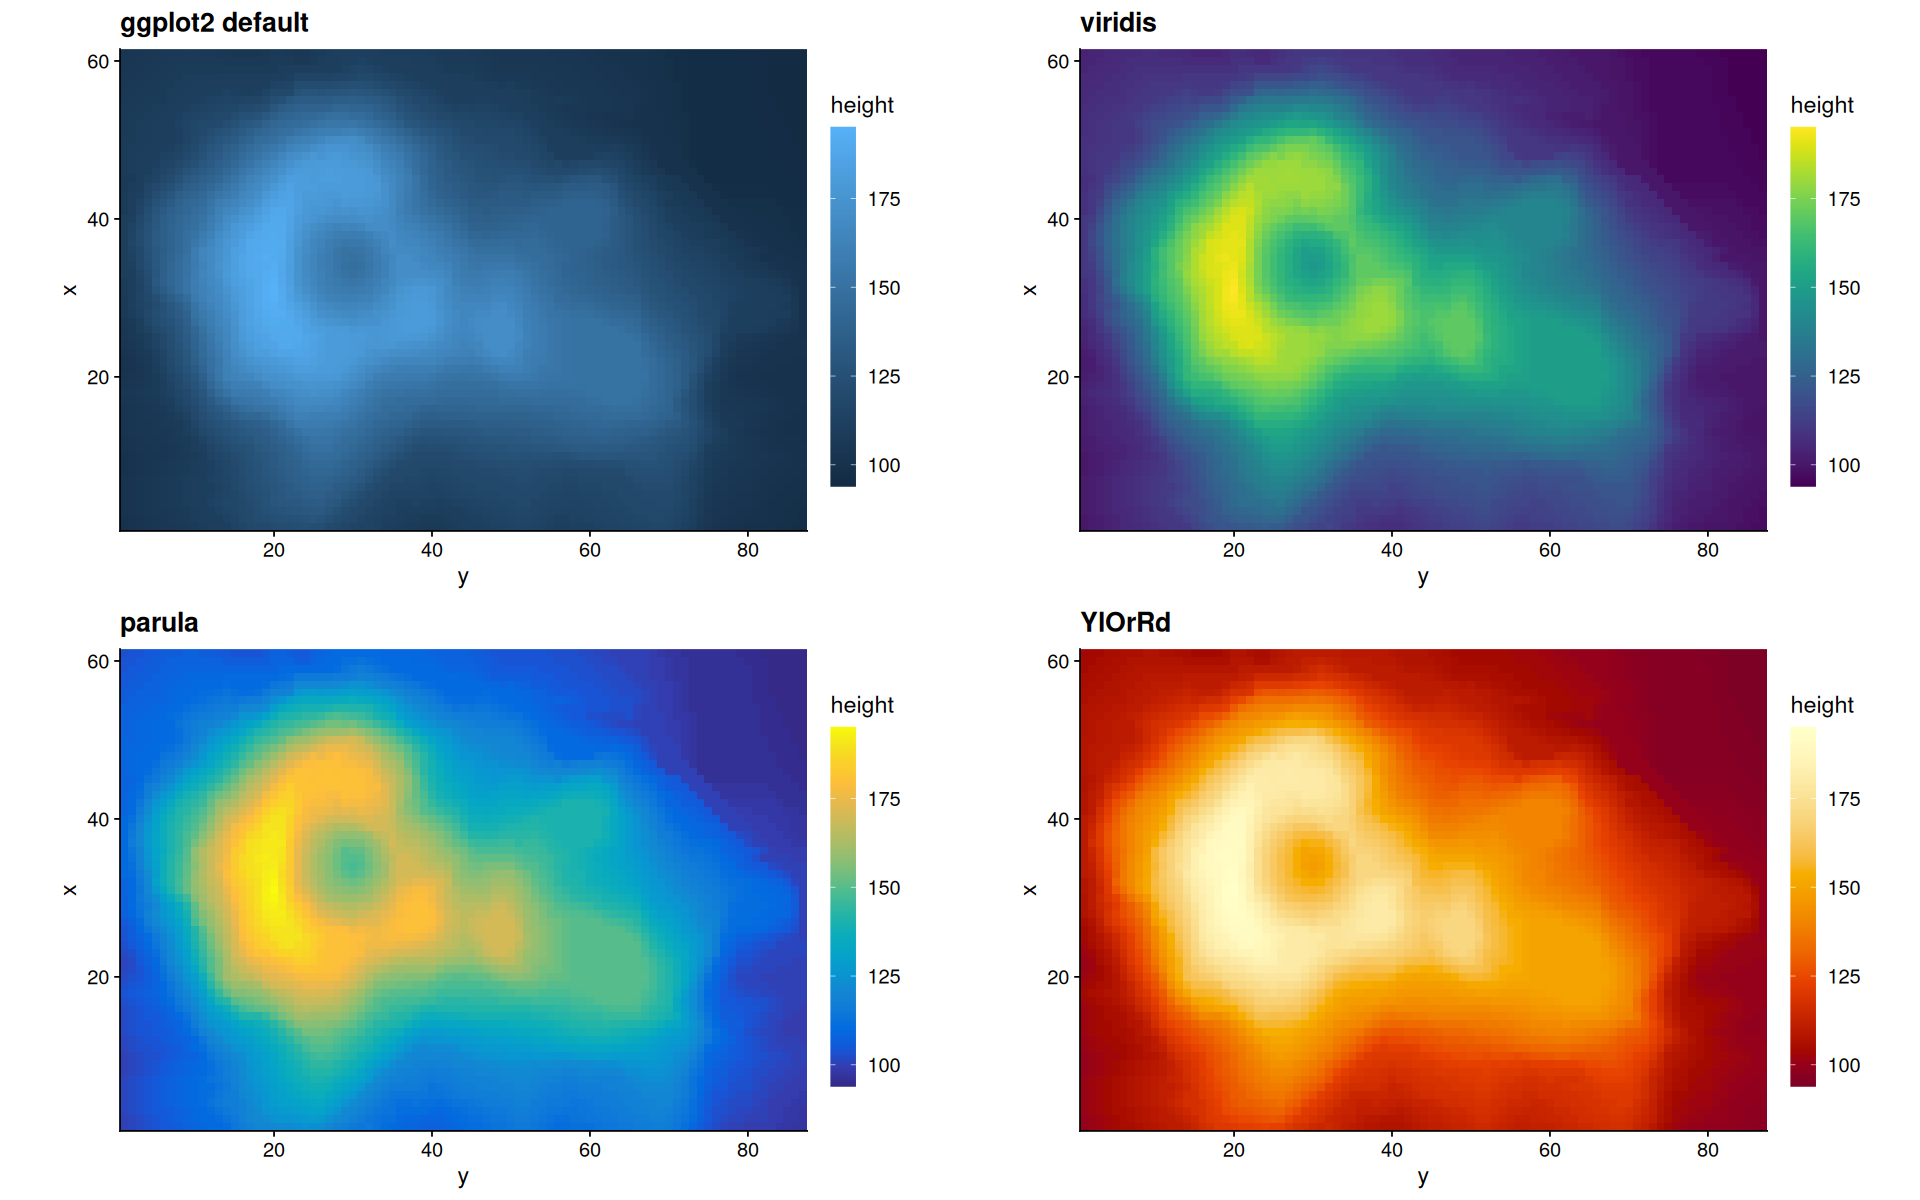

In [6]:
p1 <- p + ggtitle('ggplot2 default')
p2 <- p + scale_fill_viridis() + ggtitle('viridis')
p3 <- p + scale_fill_paletteer_c('pals::parula') + ggtitle('parula')
p4 <- p + scale_fill_paletteer_c('grDevices::YlOrRd') + ggtitle('YlOrRd')

plot_grid(p1,p2,p3,p4)

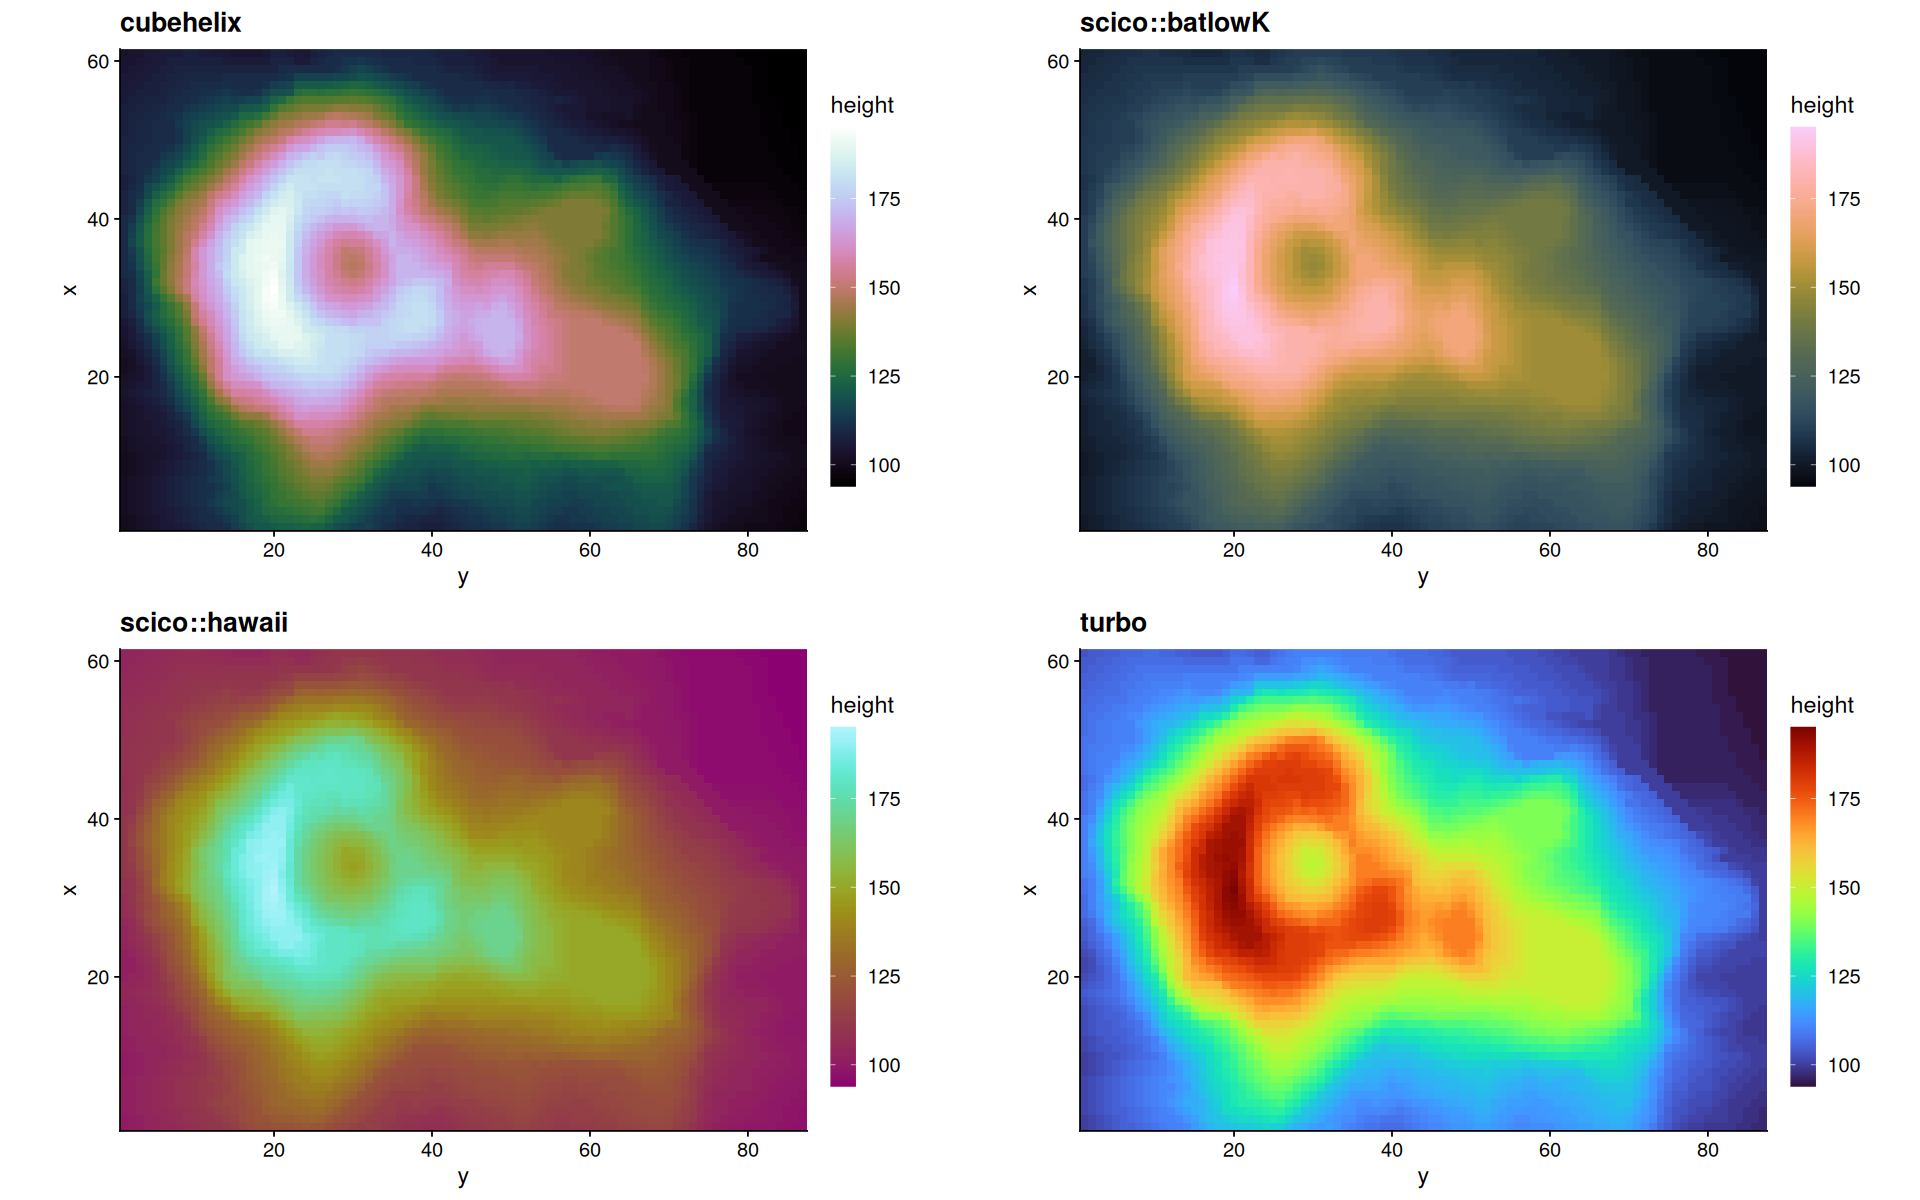

In [7]:
p1 <- p + scale_fill_gradientn(colors=pals::cubehelix(100)) + ggtitle('cubehelix')
p2 <- p + scale_fill_paletteer_c('scico::batlowK') + ggtitle('scico::batlowK')
p3 <- p + scale_fill_paletteer_c('scico::hawaii', direction = 1) + ggtitle('scico::hawaii')
p4 <- p + scale_fill_viridis(option='turbo') + ggtitle('turbo')

plot_grid(p1,p2,p3,p4)

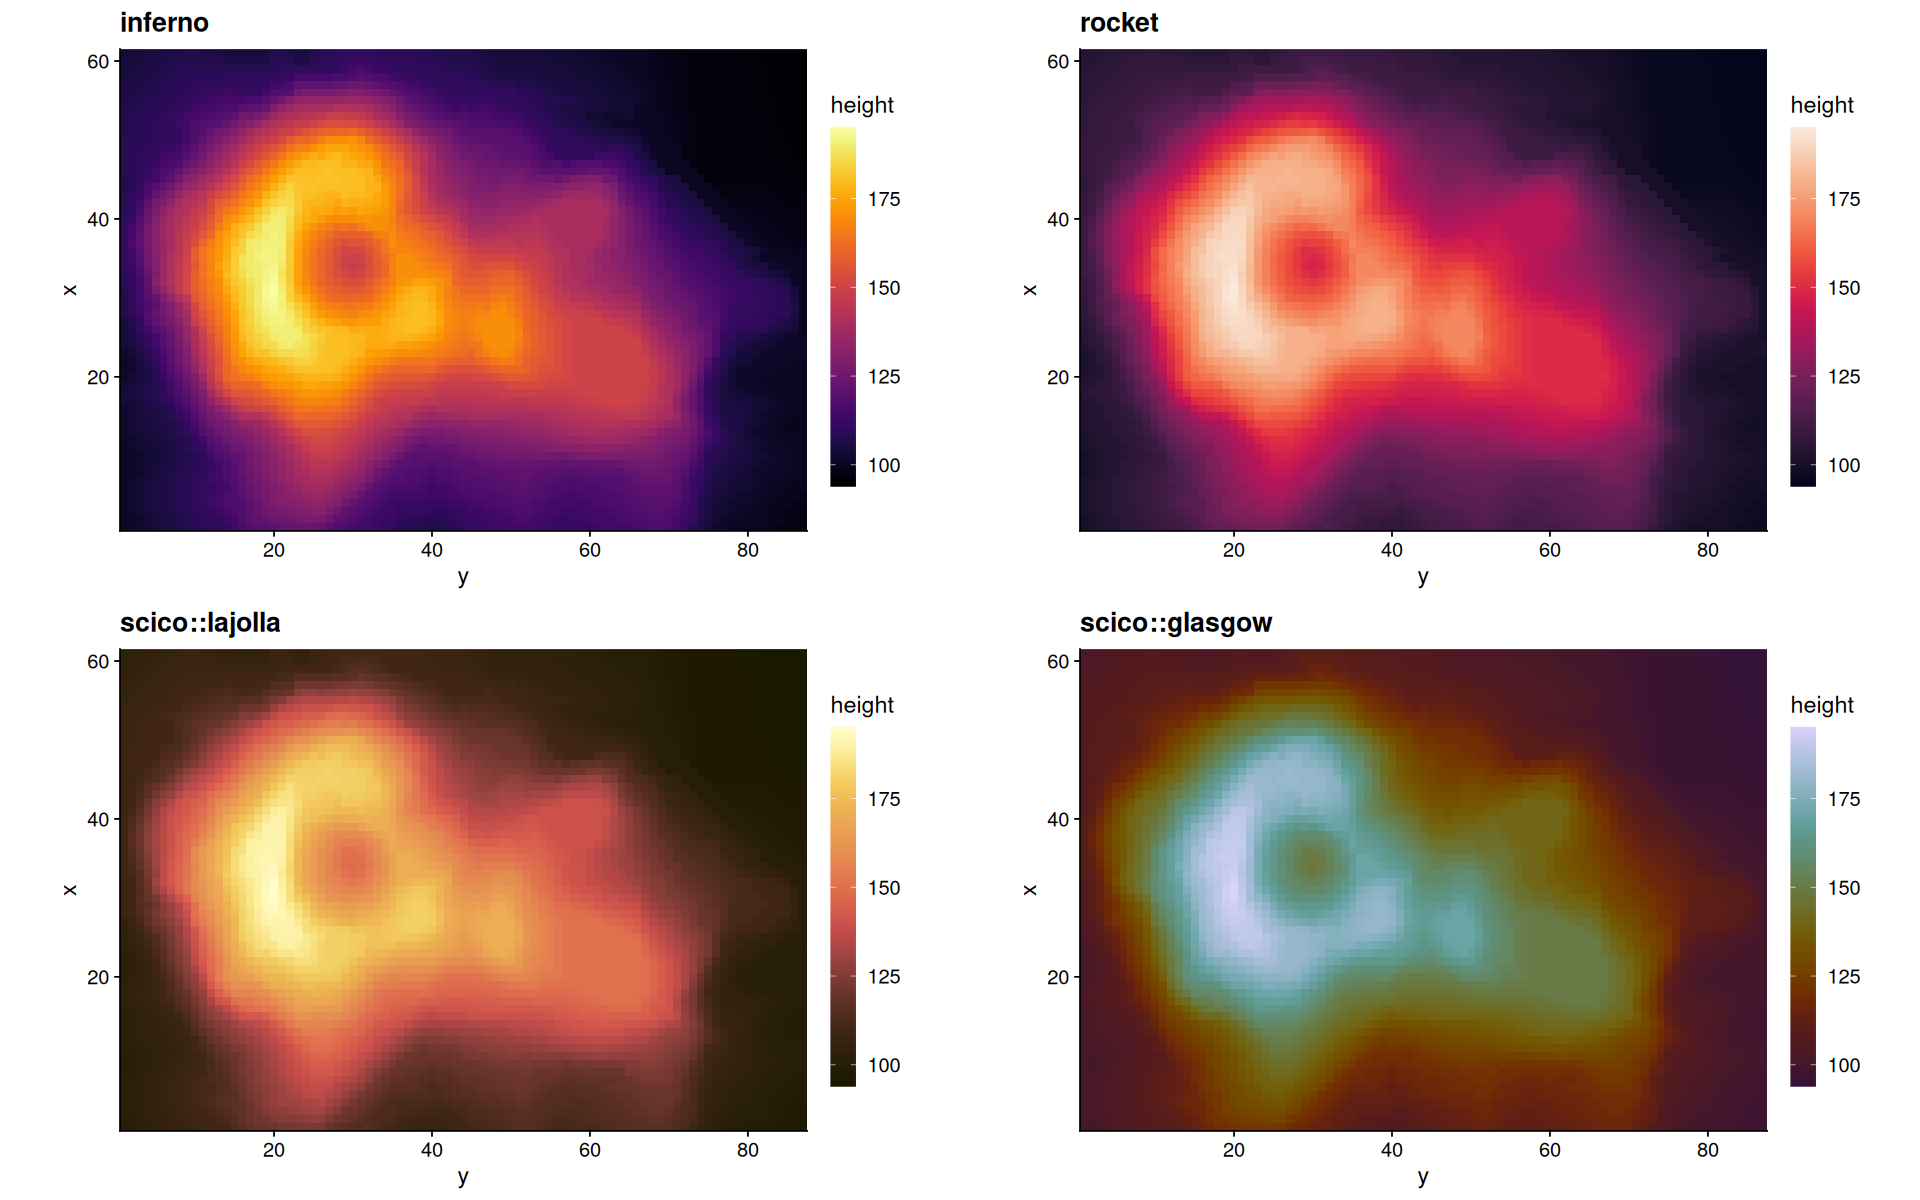

In [8]:
p1 <- p + scale_fill_viridis(option='inferno') + ggtitle('inferno')
p2 <- p + scale_fill_viridis(option='rocket') + ggtitle('rocket')
p3 <- p + scale_fill_paletteer_c('scico::lajolla') + ggtitle('scico::lajolla')
p4 <- p + scale_fill_scico(palette='glasgow') + ggtitle('scico::glasgow')

plot_grid(p1,p2,p3,p4)

In [9]:
data(boats, package = 'imager')

In [10]:
p <- imager::grayscale(boats) |> 
as.data.frame.table() |>
ggplot(aes(x=Var1, y=desc(Var2), fill=Freq)) +
geom_raster() +
coord_fixed() +
theme_void() +
guides(fill=guide_colourbar(barheight=15,direction = 'vertical')) +
labs(fill='')

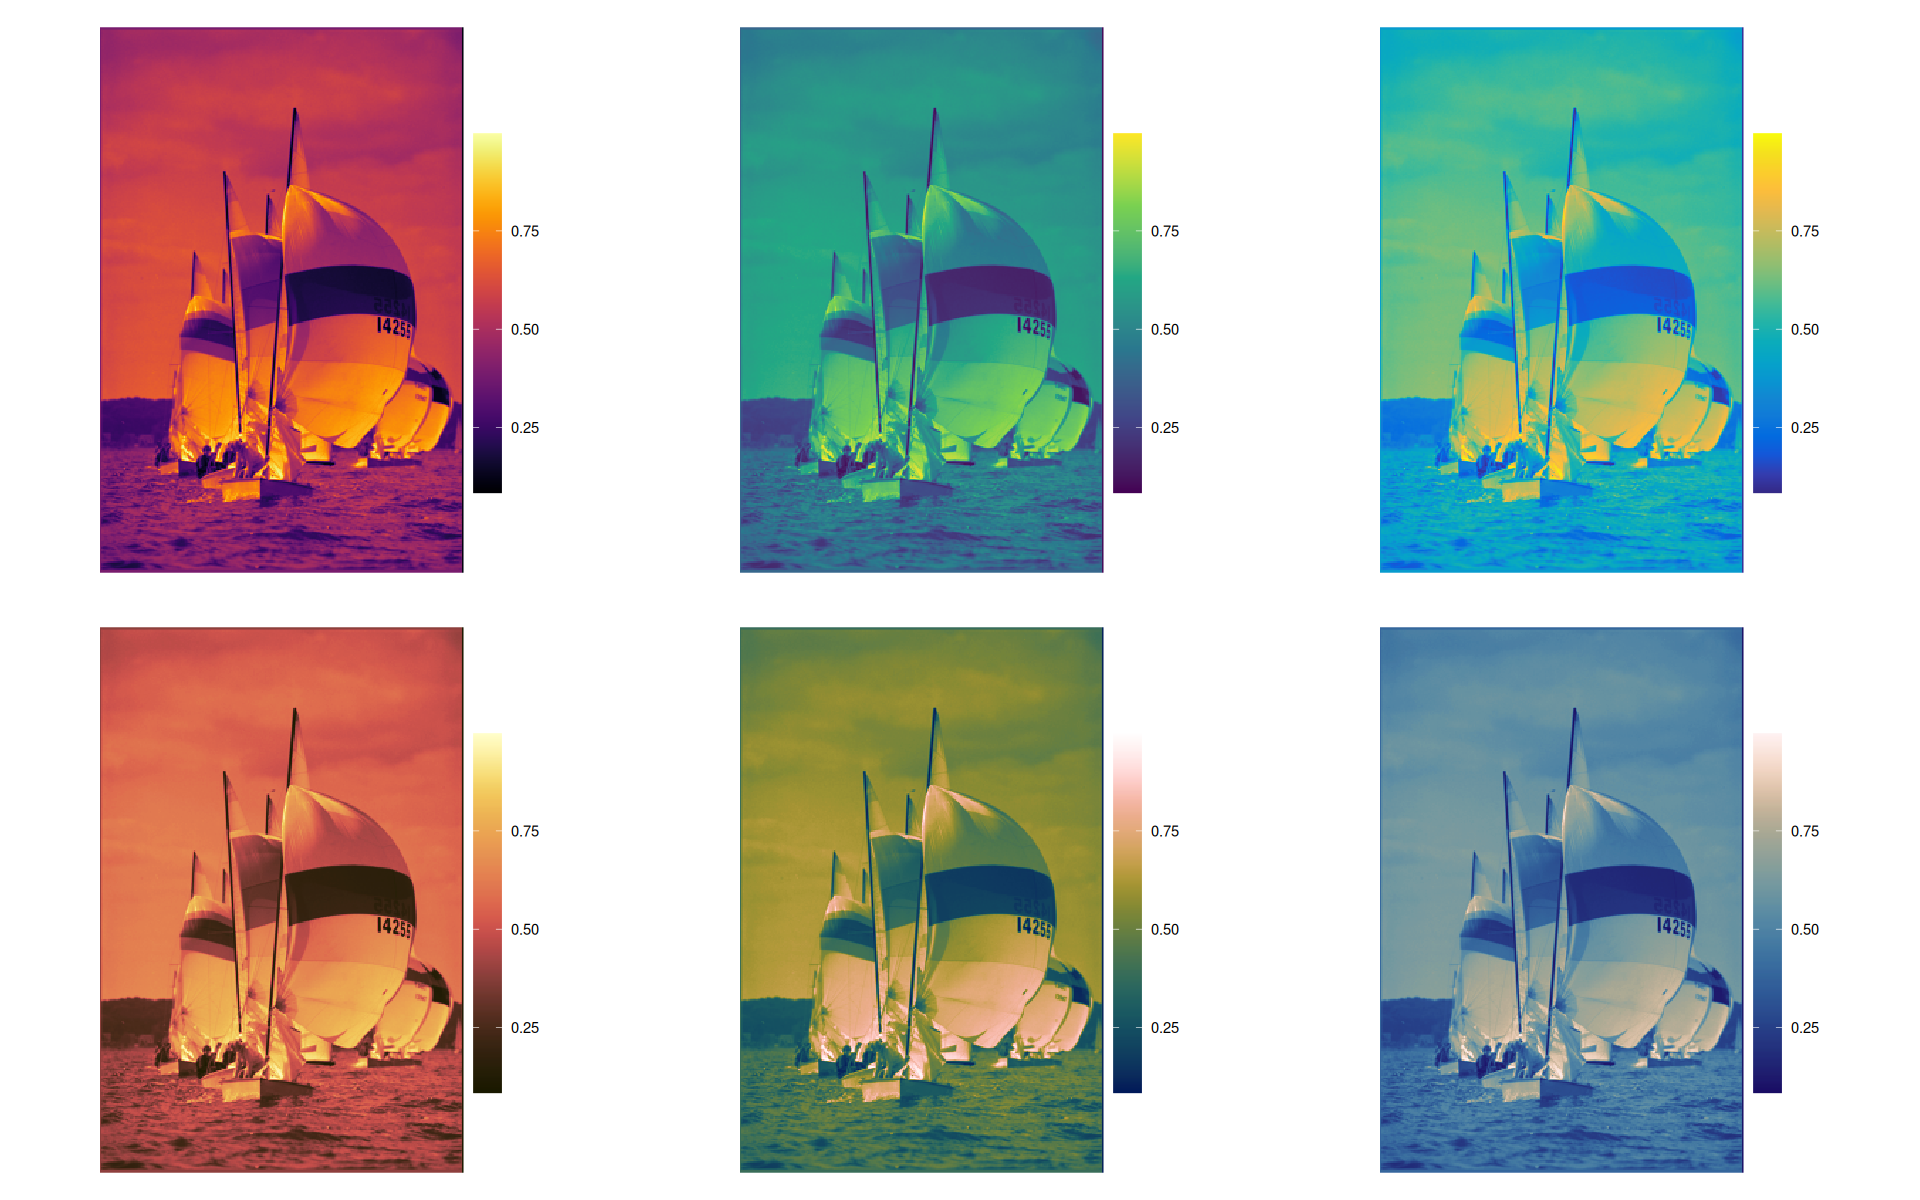

In [11]:
p1 <- p + scale_fill_viridis(option='inferno')
p2 <- p + scale_fill_viridis_c()
p3 <- p + scale_fill_paletteer_c('pals::parula')
p4 <- p + scale_fill_scico(palette='lajolla')
p5 <- p + scale_fill_scico(palette='batlowW')
p6 <- p + scale_fill_scico(palette='lapaz')

plot_grid(p1,p2,p3,p4,p5,p6, nrow=2)

# Discrete color palettes

ref links:
* https://colorbrewer2.org/
* https://emilhvitfeldt.github.io/r-color-palettes/discrete.html

In [12]:
library(ggdensity)
library(ggbeeswarm)
library(patchwork)


Attaching package: 'patchwork'


The following object is masked from 'package:cowplot':

    align_plots




`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


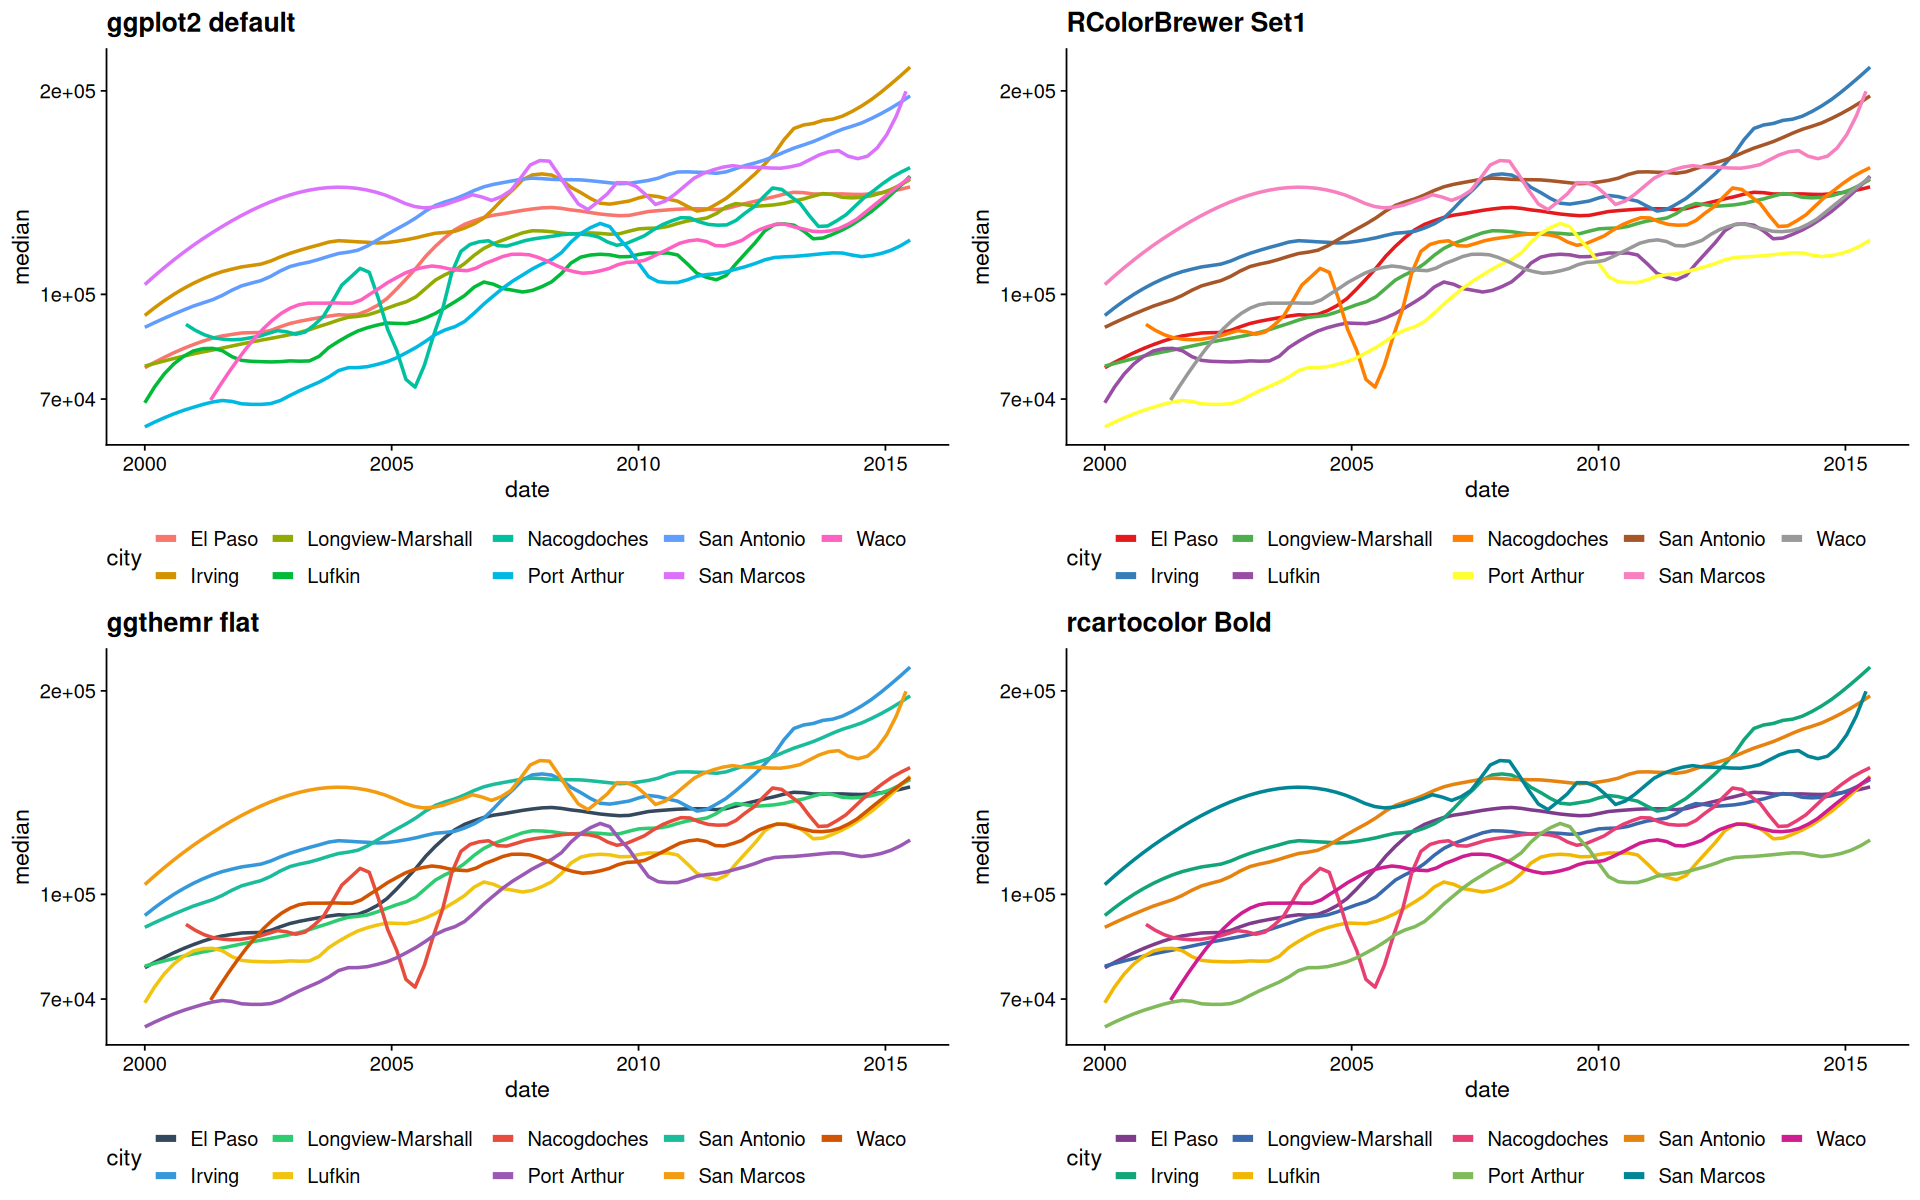

In [13]:
set.seed(456)
p1 <- filter(txhousing, city %in% sample(unique(txhousing$city), 9), !is.na(median)) |>
ggplot(aes(x=date, y=median, color=city)) + 
geom_smooth(se=F, span=0.2) +
theme(legend.position='bottom') +
scale_y_log10() +
guides(color = guide_legend(override.aes = list(linewidth=2))) + 
ggtitle('ggplot2 default')

p2 <- p1 + scale_color_brewer(palette='Set1') + ggtitle('RColorBrewer Set1')
p3 <- p1 + scale_color_paletteer_d("ggthemr::flat") + ggtitle('ggthemr flat')
p4 <- p1 + scale_color_paletteer_d("rcartocolor::Bold") + ggtitle('rcartocolor Bold')

plot_grid(p1,p2,p3,p4)

# Diverging color palettes

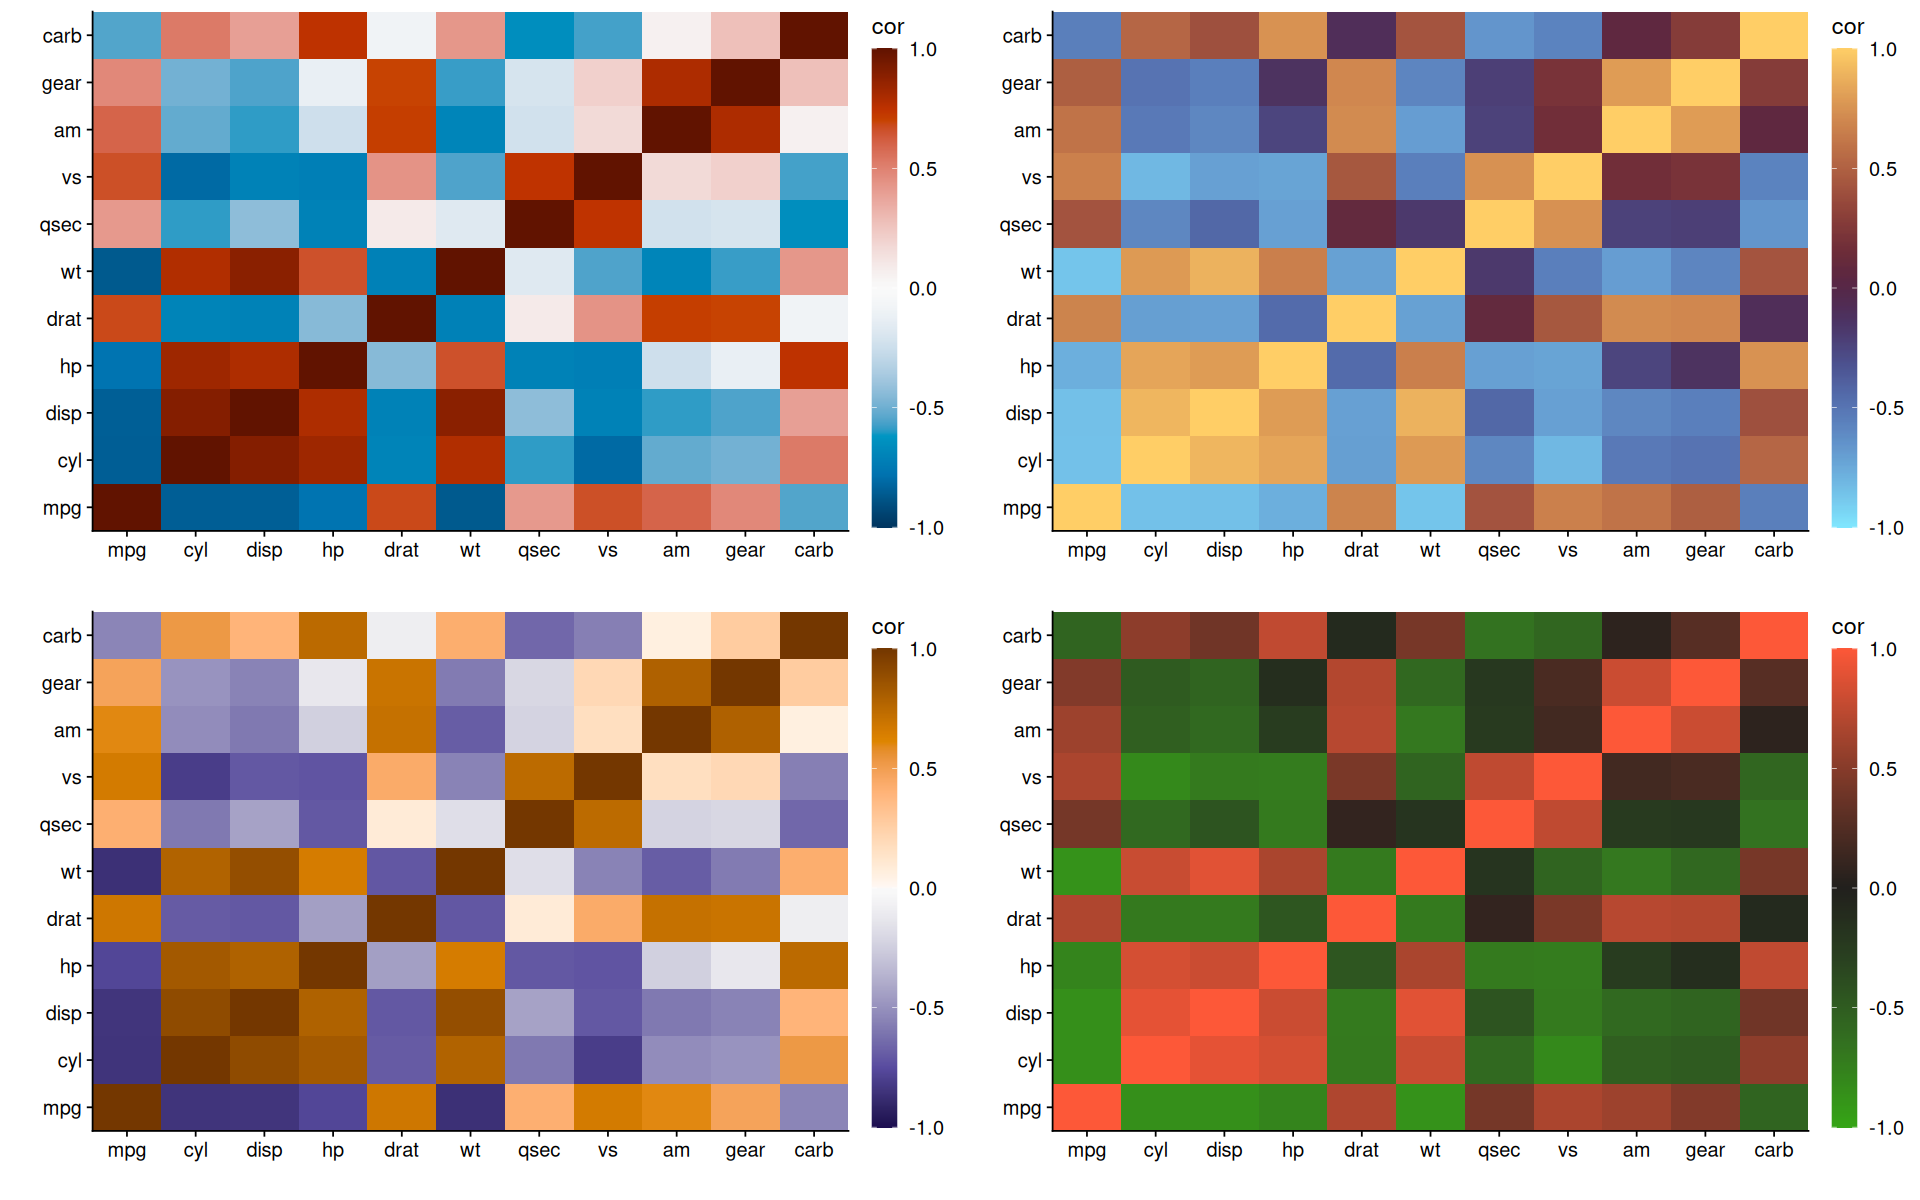

In [14]:
p <- cor(mtcars) |>
reshape2::melt(value.name='cor') |>
ggplot(aes(x=Var1, y=Var2, fill=cor)) + 
geom_tile() +
labs(x='', y='') +
coord_cartesian(expand=0) +
guides(fill=guide_colourbar(barheight=20))

p1 <- p + scale_fill_paletteer_c(palette = 'grDevices::RdBu', limits=c(-1,1), direction = -1)
p2 <- p + scale_fill_scico(palette='managua', limits=c(-1,1), direction=-1)
p3 <- p + scale_fill_paletteer_c(palette='grDevices::PuOr',limits=c(-1,1), direction=-1)
p4 <- p + scale_fill_paletteer_c(palette='pals::kovesi.diverging_gkr_60_10_c40',limits=c(-1,1))

plot_grid(p1,p2,p3,p4)

In [15]:
data(nottem, package='datasets')

In [82]:
p <- 
tidy(nottem) |>
rename(temp=value) |>
mutate(med_temp = median(temp)) |>
mutate(year=floor(index), time_of_year = index - year) |>
ggplot(aes(x=time_of_year, y=temp, color=temp-med_temp)) +
geom_hline(aes(yintercept=med_temp),linetype=2) +
geom_beeswarm() +
labs(color='') +
guides(color=guide_colourbar(barheight=15,direction = 'vertical')) 

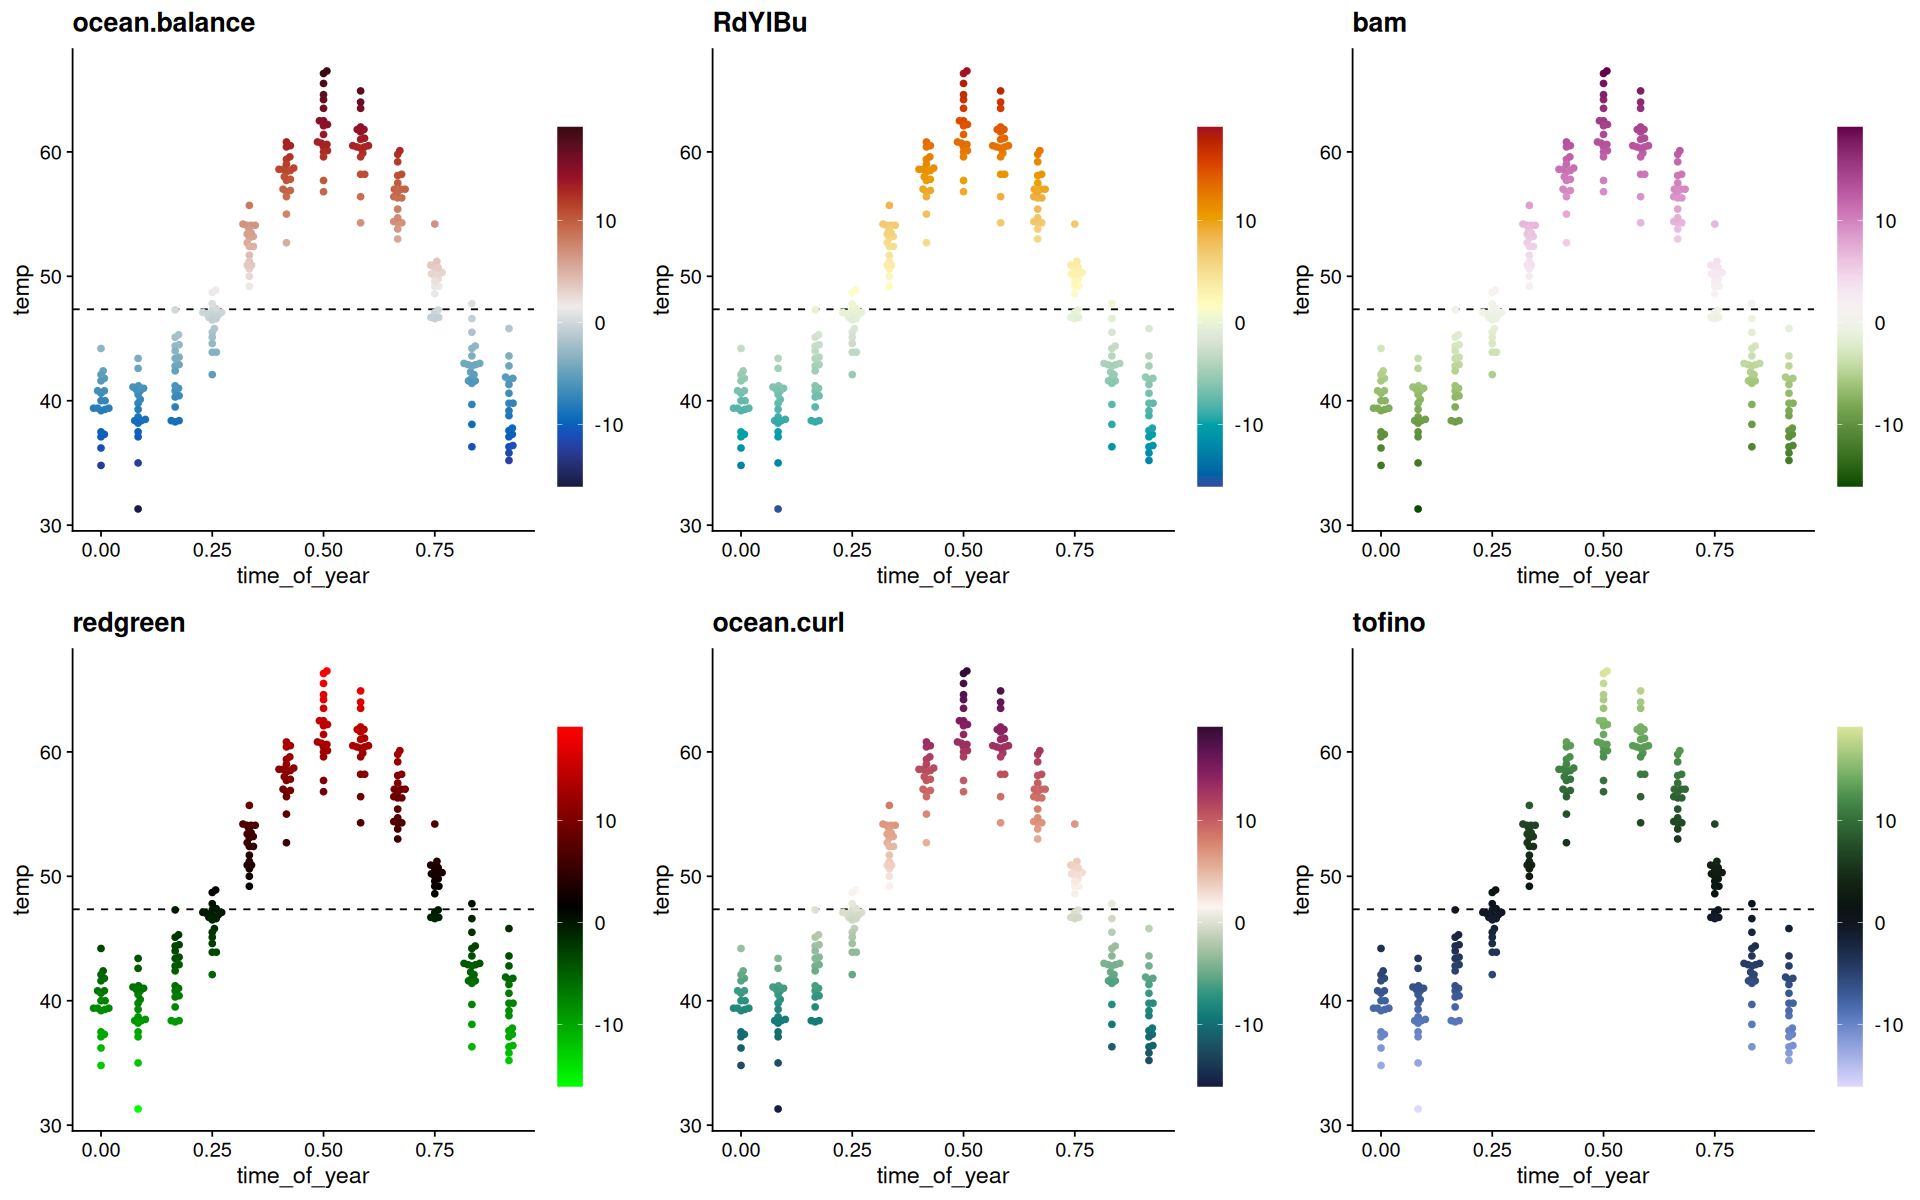

In [85]:
p1 <- p + scale_color_paletteer_c('pals::ocean.balance') + ggtitle('ocean.balance')
p2 <- p + scale_color_paletteer_c('grDevices::RdYlBu', direction = -1) + ggtitle('RdYlBu')
p3 <- p + scale_color_scico(palette='bam', direction = -1) + ggtitle('bam')
p4 <- p + scale_color_paletteer_c('oompaBase::redgreen') + ggtitle('redgreen')
p5 <- p + scale_color_paletteer_c(palette='pals::ocean.curl') + ggtitle('ocean.curl')
p6 <- p + scale_color_scico(palette='tofino') + ggtitle('tofino')

plot_grid(p1,p2,p3,p4,p5,p6)

# Cyclic Color palettes

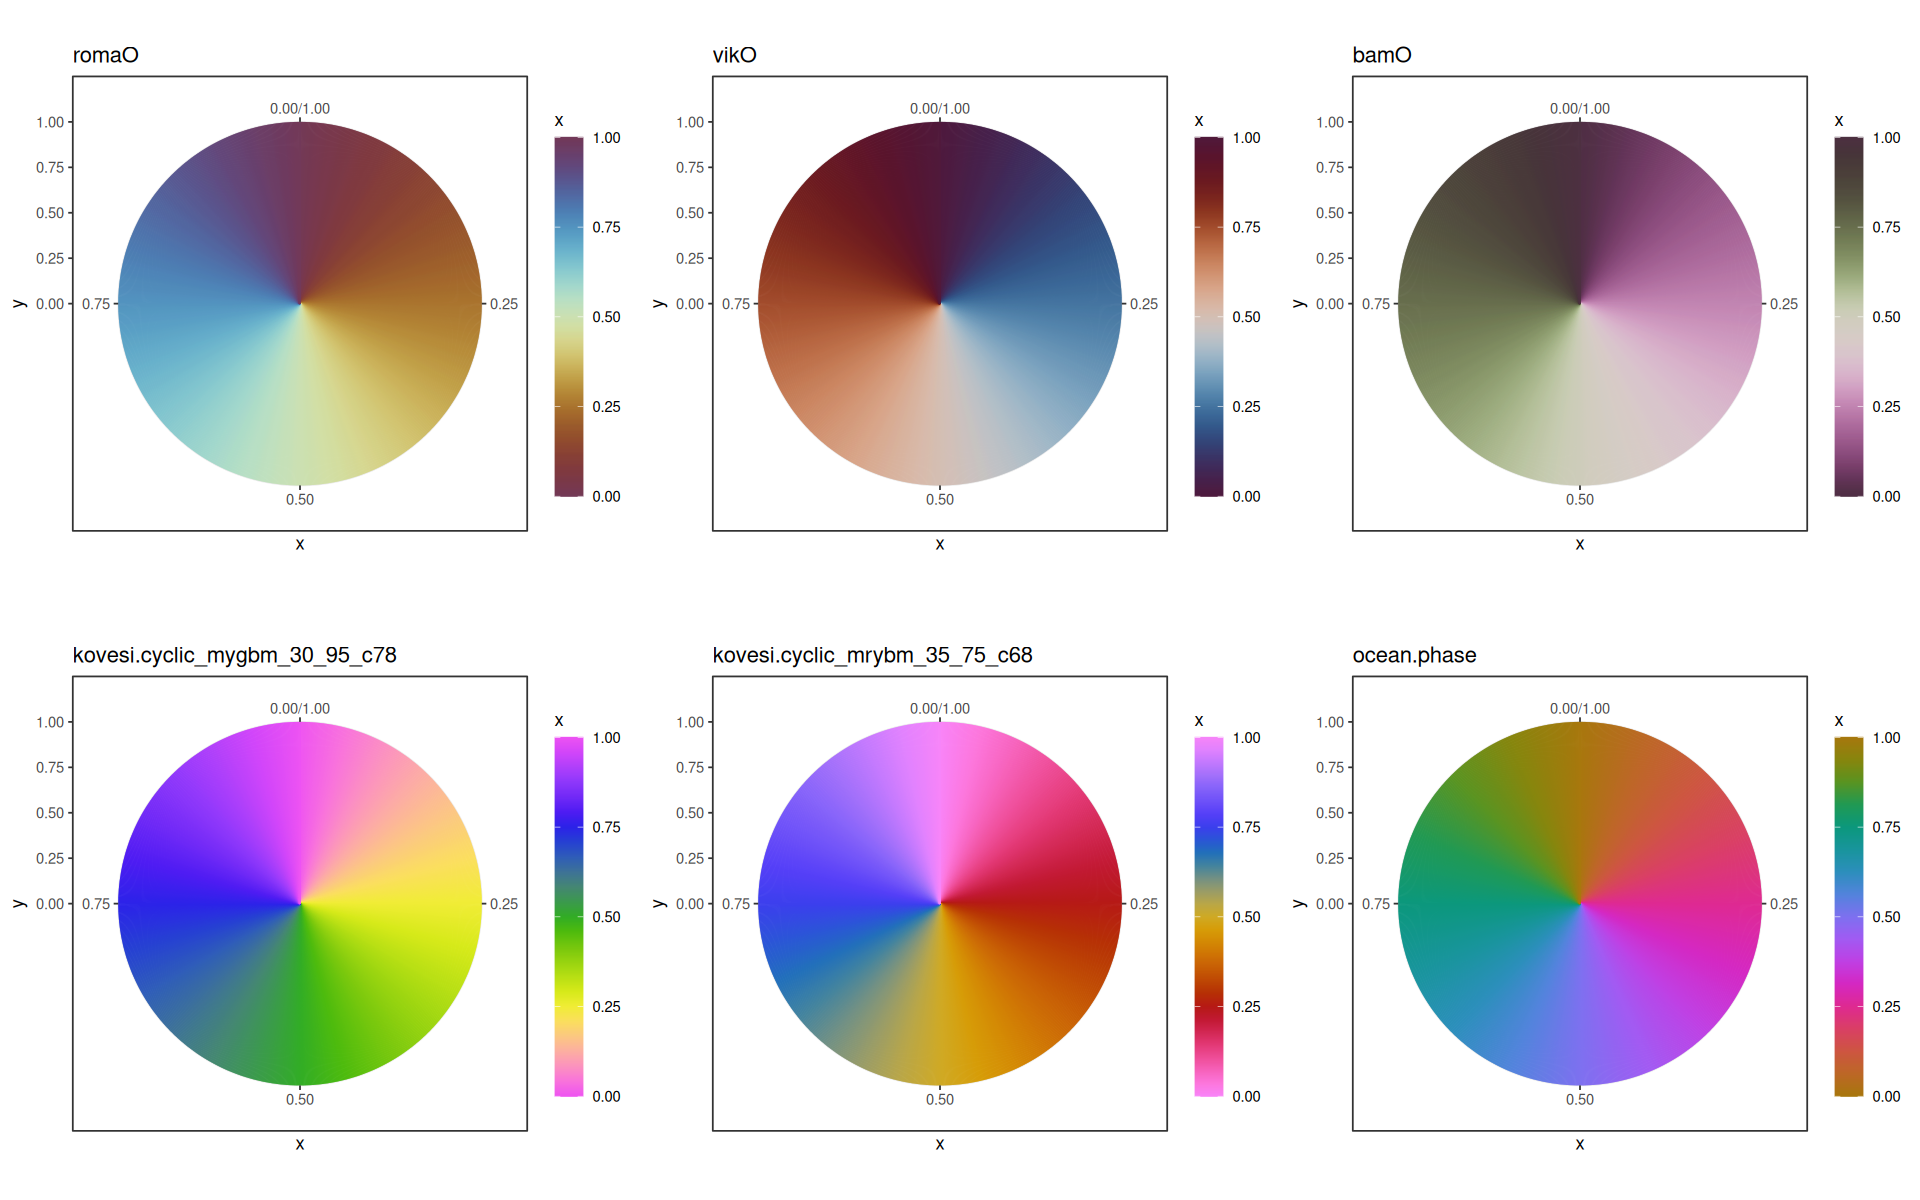

In [122]:
set.seed(42)
p <-
tibble(
    x=seq(0, 1, length.out=1e3)
) |>
ggplot(aes(y=0,yend=1,x=x,color=x)) +
geom_segment() +
theme_bw() +
coord_radial(expand=FALSE) +
guides(color=guide_colourbar(barheight=15,direction = 'vertical'))


p1 <- p + scale_color_scico(palette="romaO") + ggtitle('romaO')
p2 <- p + scale_color_scico(palette="vikO") + ggtitle('vikO')
p3 <- p + scale_color_scico(palette="bamO") + ggtitle('bamO')
p4 <- p + scale_color_paletteer_c("pals::kovesi.cyclic_mygbm_30_95_c78") + ggtitle('kovesi.cyclic_mygbm_30_95_c78')
p5 <- p + scale_color_paletteer_c("pals::kovesi.cyclic_mrybm_35_75_c68") + ggtitle('kovesi.cyclic_mrybm_35_75_c68')
p6 <- p + scale_color_paletteer_c("pals::ocean.phase") + ggtitle('ocean.phase')

plot_grid(p1,p2,p3,p4,p5,p6)